In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import ttest_ind,ttest_rel
from scipy import stats

In [2]:
data=pd.read_csv('adult.csv')
data.head()                          #head shows only first four column

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [4]:
data_num=data.copy()

In [5]:
data.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.describe(include=["O"])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [7]:
data.isnull().sum()

age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [8]:
#data cleaning

In [9]:
attrib,counts=np.unique(data['workclass'],return_counts=True)
most_freq_attrib=attrib[np.argmax(counts,axis=0)]
data['workclass'][data['workclass']=='?']=most_freq_attrib

attrib,counts=np.unique(data['occupation'],return_counts=True)
most_freq_attrib=attrib[np.argmax(counts,axis=0)]
data['occupation'][data['occupation']=='?']=most_freq_attrib

attrib,counts=np.unique(data['native-country'],return_counts=True)
most_freq_attrib=attrib[np.argmax(counts,axis=0)]
data['native-country'][data['native-country']=='?']=most_freq_attrib

In [10]:
data['workclass'][data['workclass']=='?']

Series([], Name: workclass, dtype: object)

In [11]:
data.head(10)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [12]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [13]:
data['income']=data['income'].map({'<=50K':0,'>50K':1,'<=50K.': 0,'>50K.': 1})
data.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


In [14]:
#summary

In [15]:
data_num=data.drop(['educational-num','income'],axis=1)
data_num.describe()

,age,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1079.067626,87.502314,40.422382
std,13.710510,7452.019058,403.004552,12.391444
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [16]:
data.describe(include='O')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,48842,48842,48842,48842,48842,48842,48842,48842
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,36705,15784,22379,8981,19716,41762,32650,44689


In [17]:
#eda

In [18]:
#univariate analysis

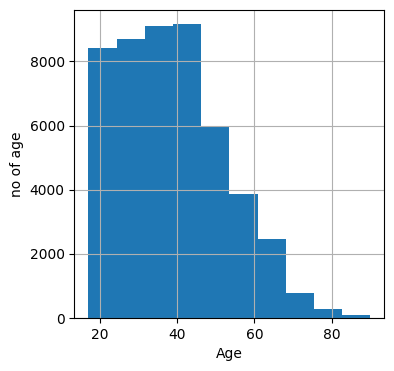

In [19]:
data['age'].hist(figsize=(4,4))
plt.xlabel('Age')
plt.ylabel("no of age")
plt.show()

In [20]:
data[data['age']>70].shape

(868, 14)

<Axes: xlabel='age'>

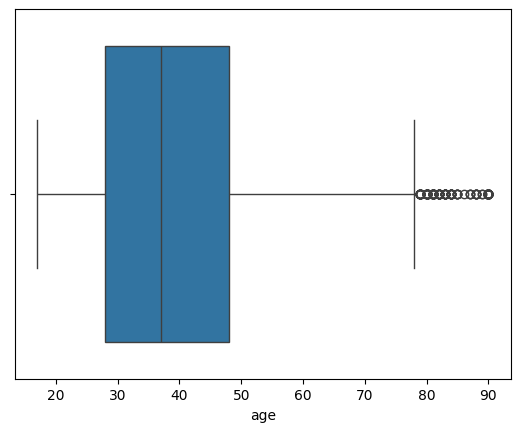

In [21]:
sns.boxplot(data['age'],orient='h')

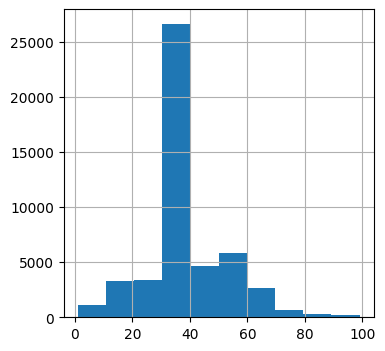

In [22]:
data['hours-per-week'].hist(figsize=(4,4))
plt.show()
                            

<Axes: xlabel='hours-per-week'>

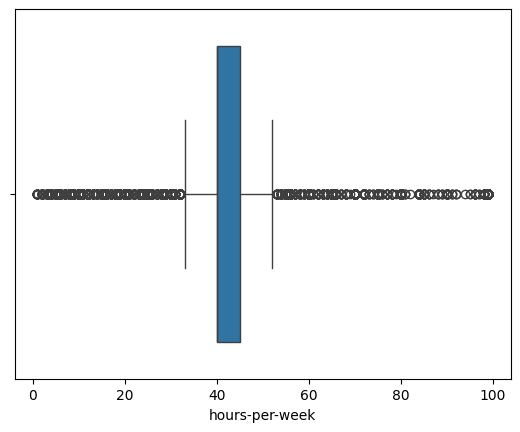

In [23]:
sns.boxplot(data['hours-per-week'],orient='h')

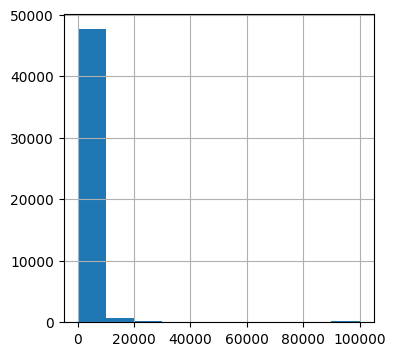

In [24]:
data["capital-gain"].hist(figsize=(4,4))
plt.show()

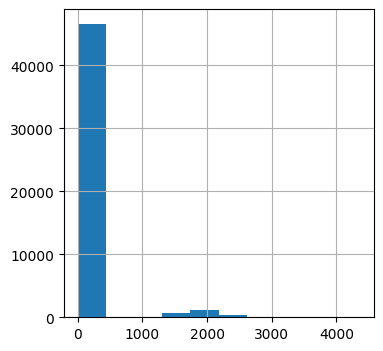

In [25]:
data["capital-loss"].hist(figsize=(4,4))
plt.show()

In [26]:
data[data["capital-loss"]>0].shape

(2282, 14)

In [27]:
# relation with capital-loss and capital-gain

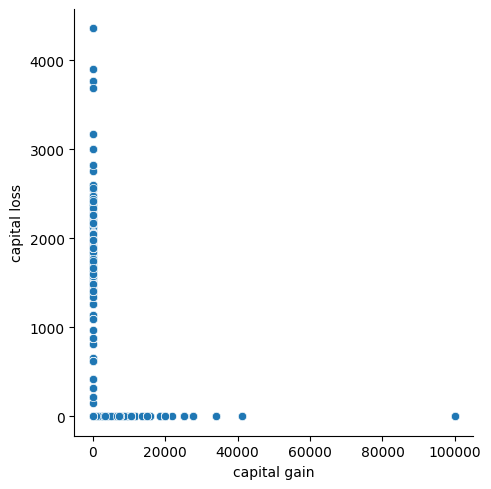

In [28]:
sns.relplot(x='capital-gain',y='capital-loss',data=data)   #data=data where data is name of tye variable where dat is stored
plt.xlabel('capital gain')
plt.ylabel('capital loss')
plt.show()

In [29]:
#since gain is parallel to x axis and loss is paralled to y axis so there is no increament while other decrases and vice versa

In [30]:
#workclass

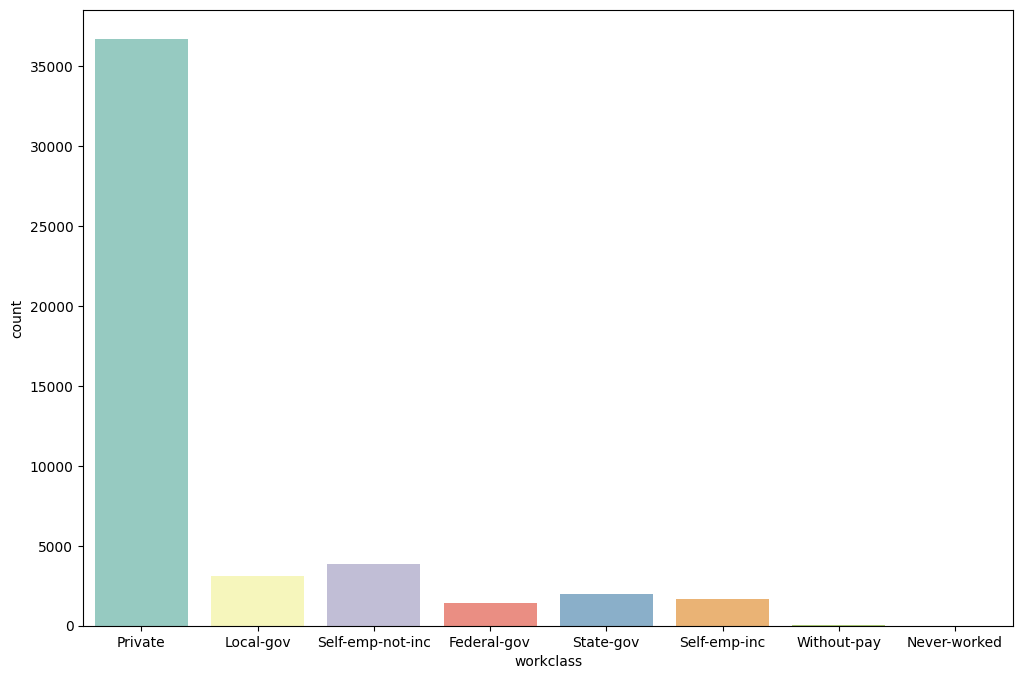

In [31]:
plt.figure(figsize=(12,8))
sns.countplot(x='workclass',data=data,palette='Set3')
plt.show()

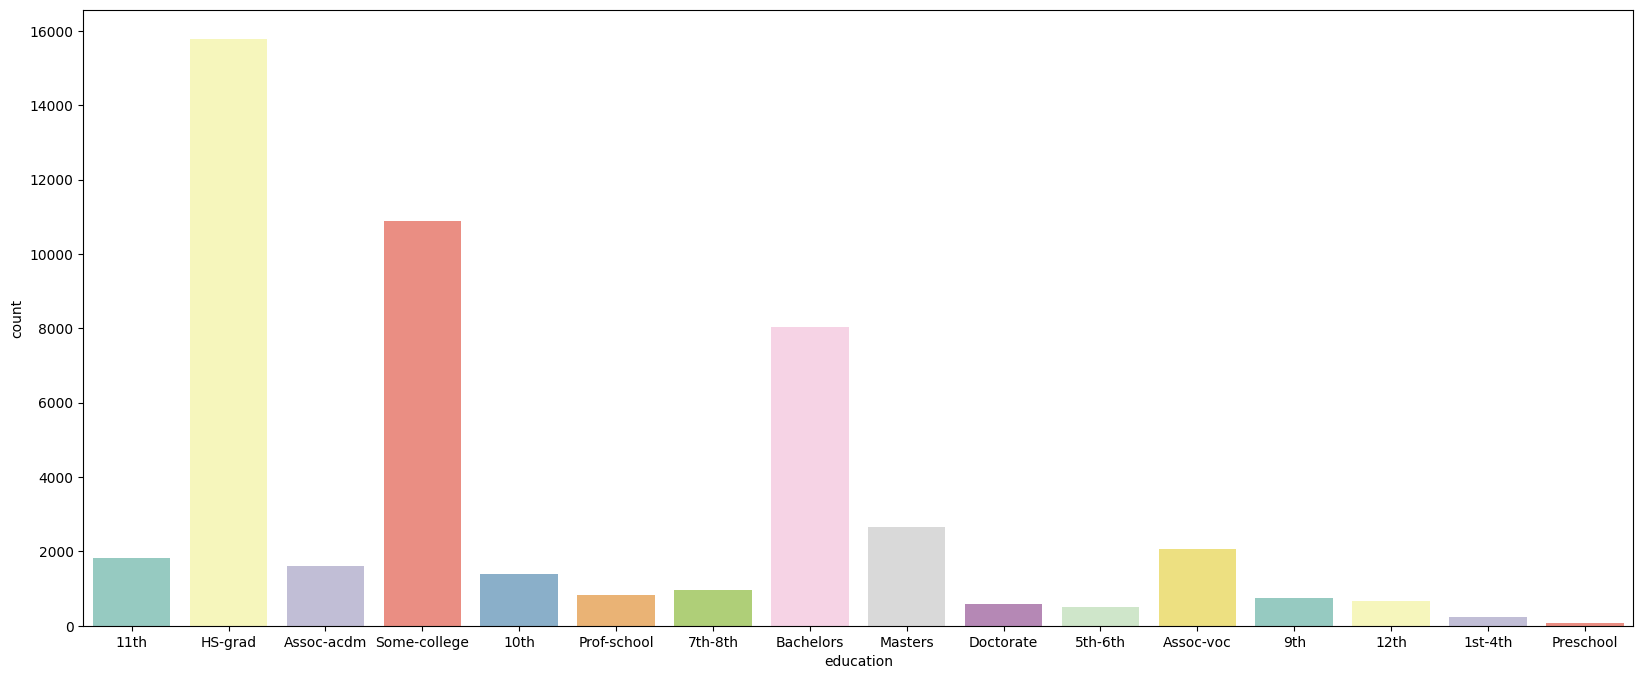

In [32]:
plt.figure(figsize=(20,8))
sns.countplot(x='education',data=data,palette='Set3')
plt.show()

In [33]:
data[(data['education'] =='Preschool') & (data['age']>=80) ].shape

(0, 14)

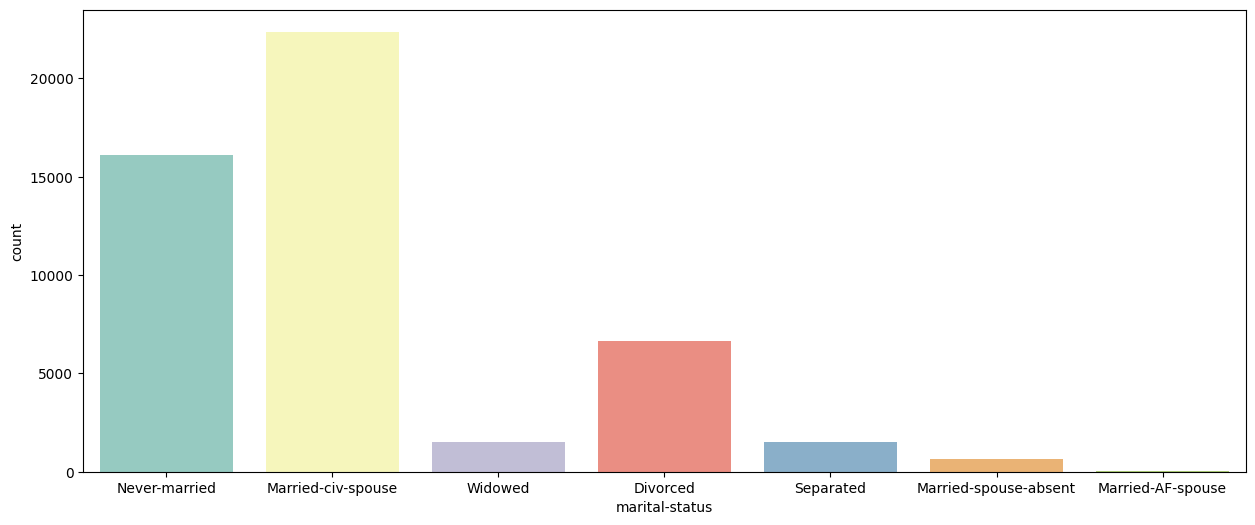

In [34]:
plt.figure(figsize=(15,6))
sns.countplot(x='marital-status',data=data,palette='Set3')
plt.show()

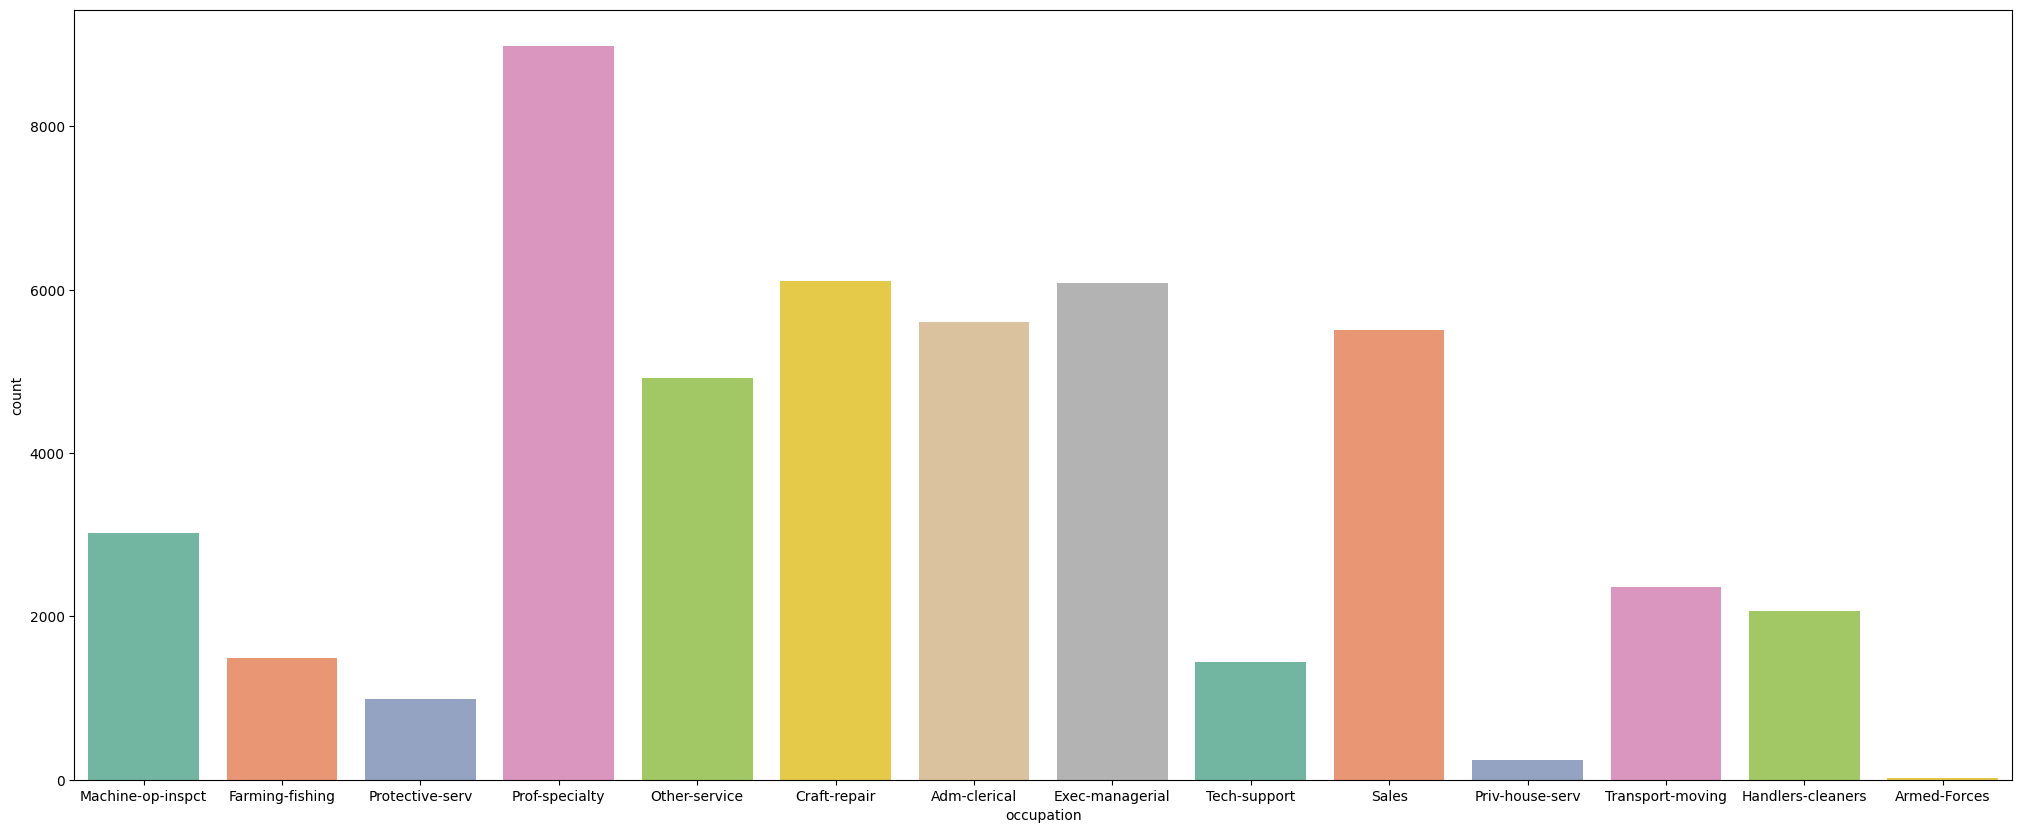

In [35]:
plt.figure(figsize=(25,10))
sns.countplot(x='occupation',data=data,palette='Set2')
plt.show()

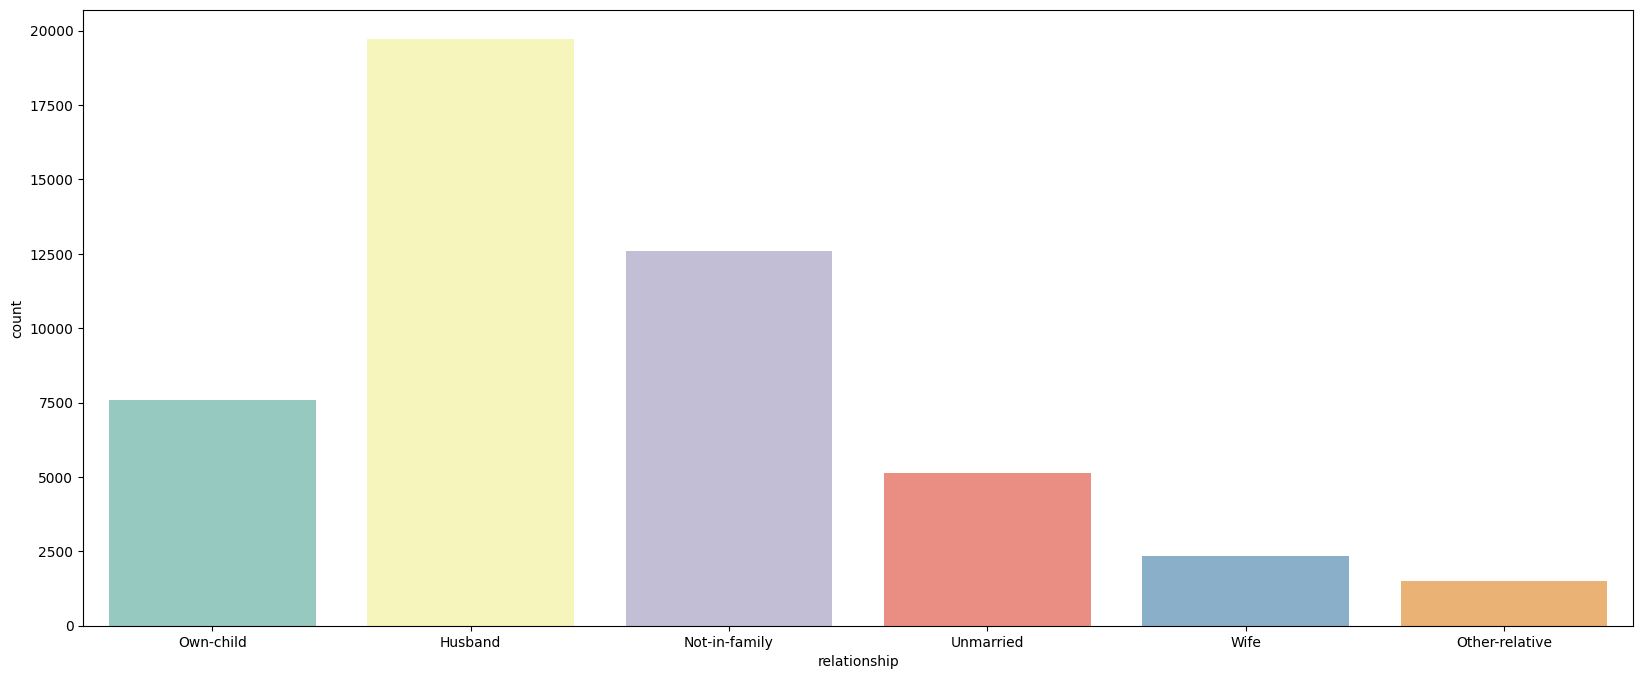

In [36]:
plt.figure(figsize=(20,8))
sns.countplot(x='relationship',data=data,palette='Set3')
plt.show()

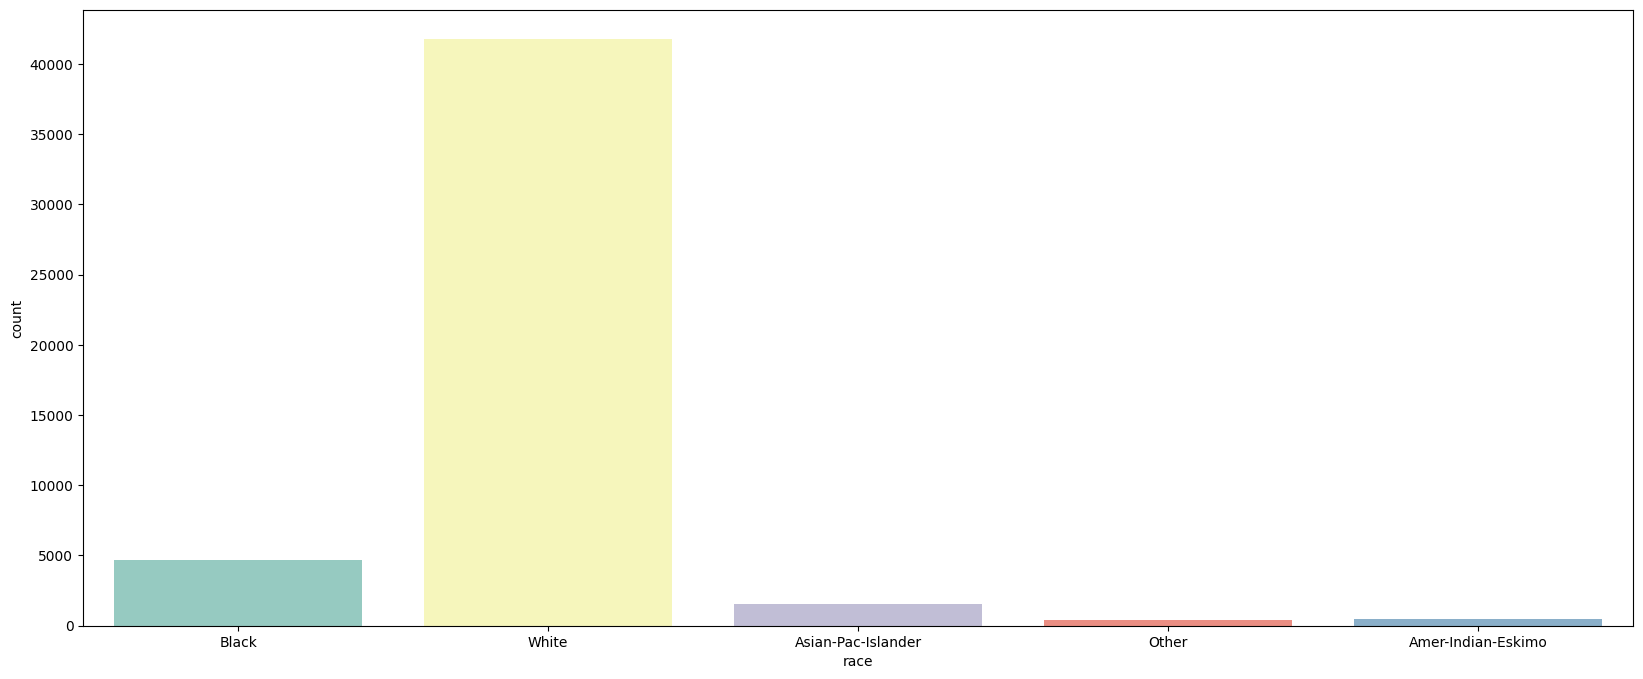

In [37]:
plt.figure(figsize=(20,8))
sns.countplot(x='race',data=data,palette='Set3')
plt.show()

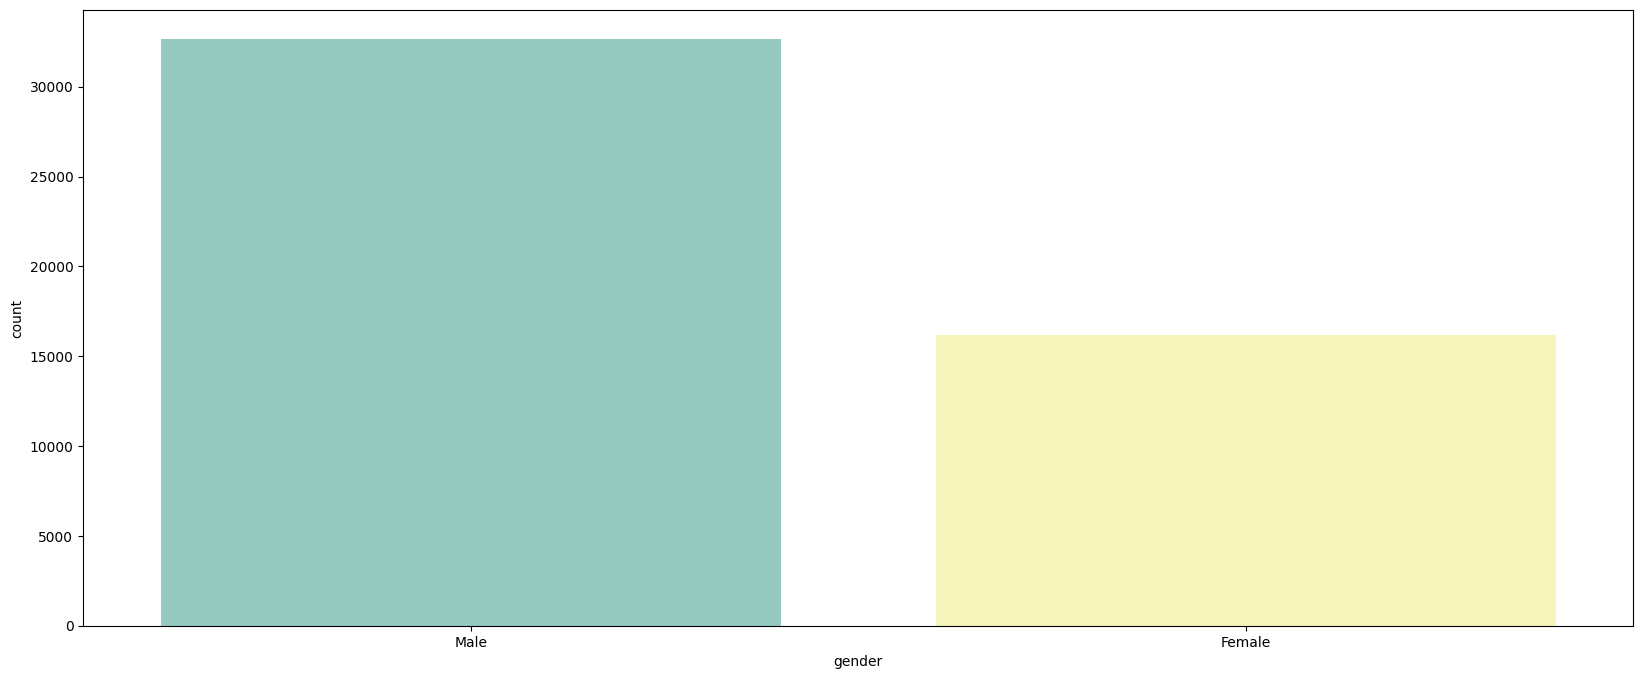

In [38]:
plt.figure(figsize=(20,8))
sns.countplot(x='gender',data=data,palette='Set3')
plt.show()

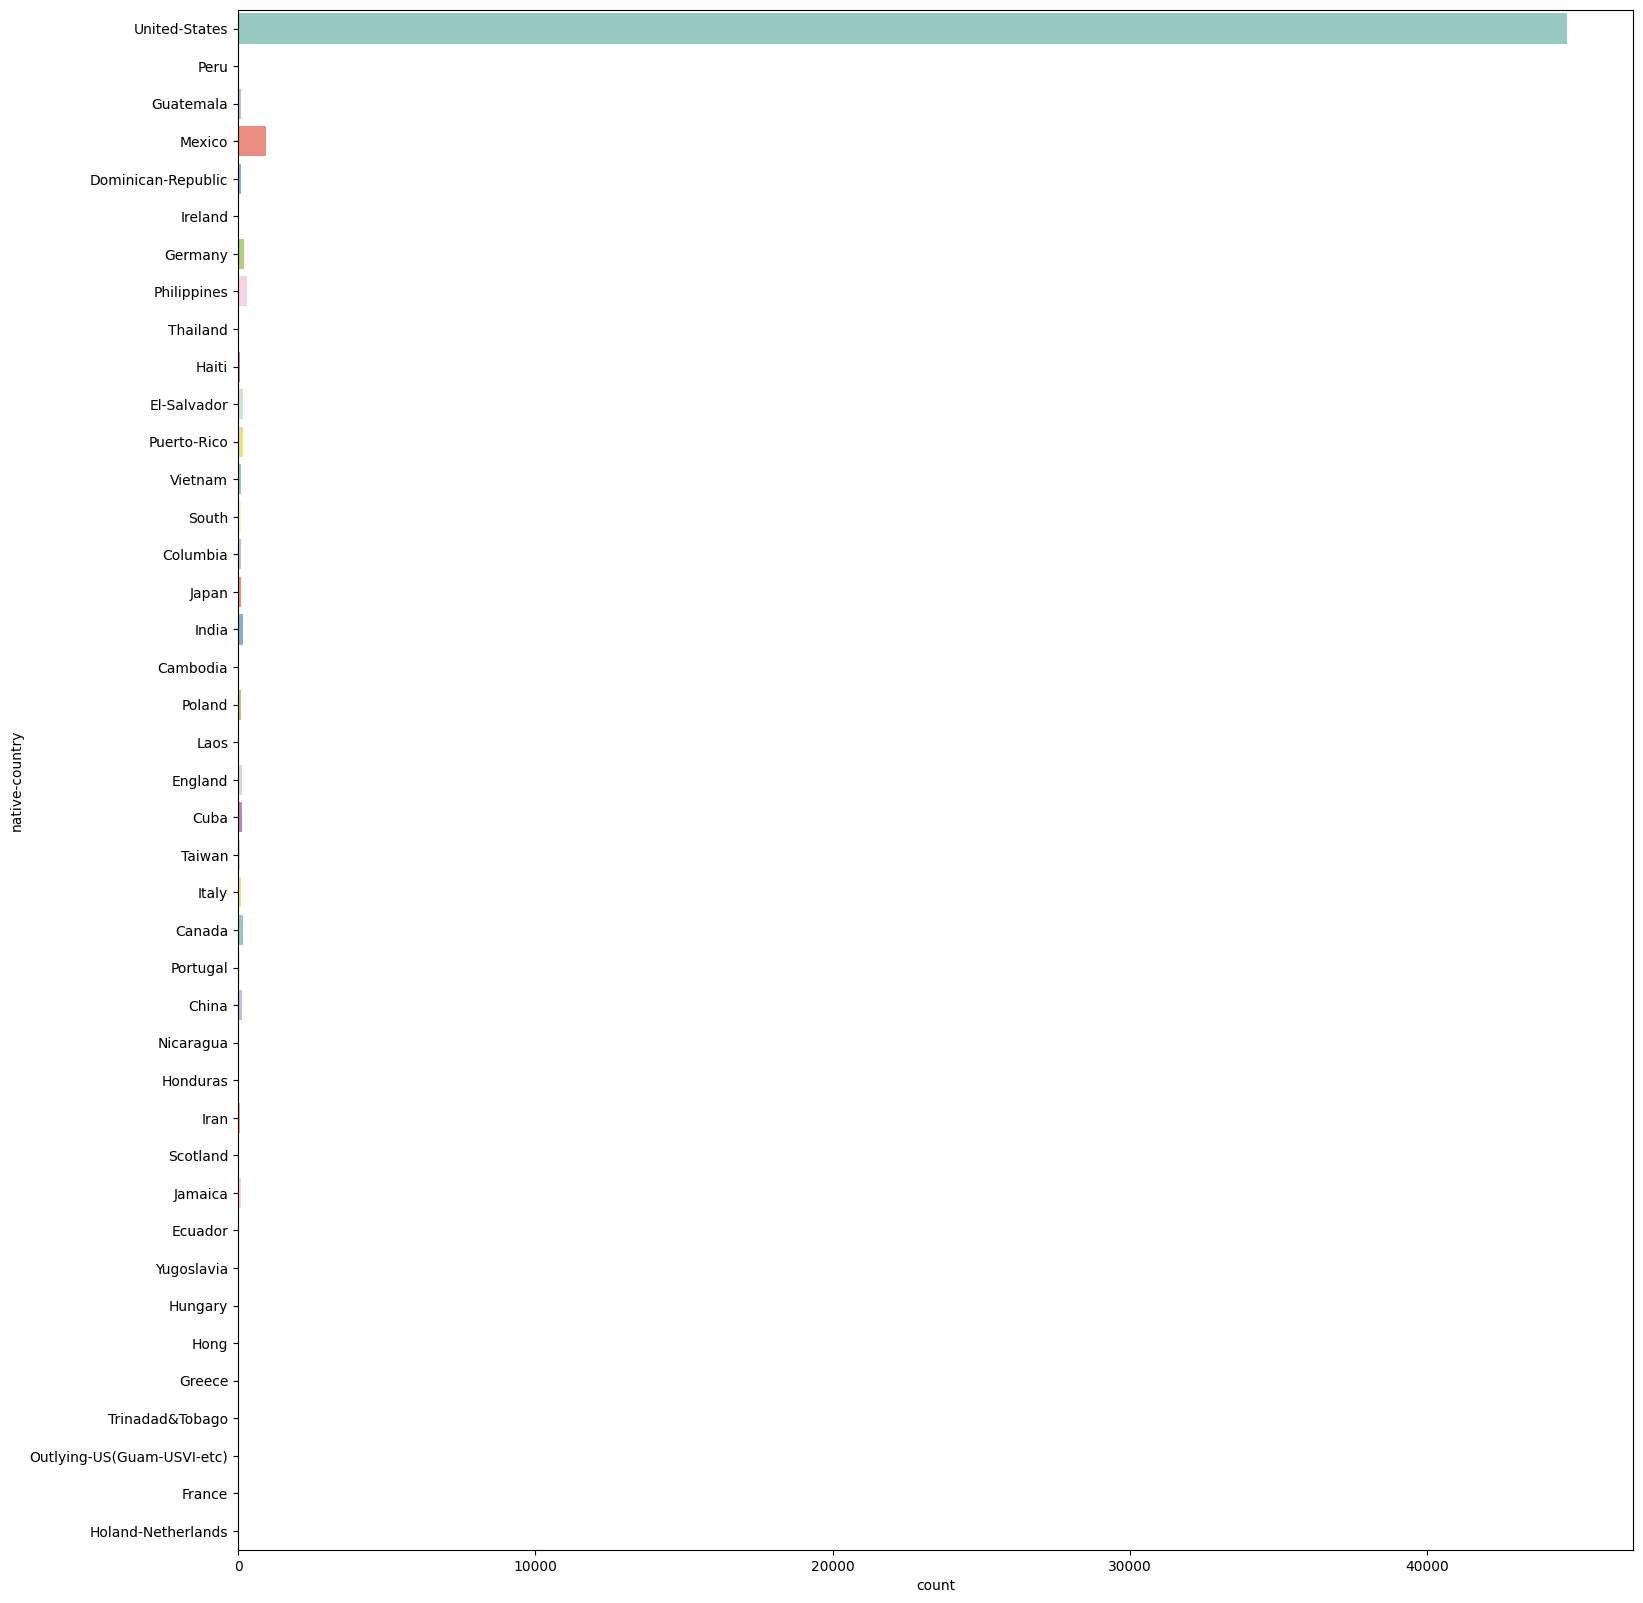

In [39]:
plt.figure(figsize=(18,20))
sns.countplot(y='native-country',data=data,palette='Set3')
plt.show()

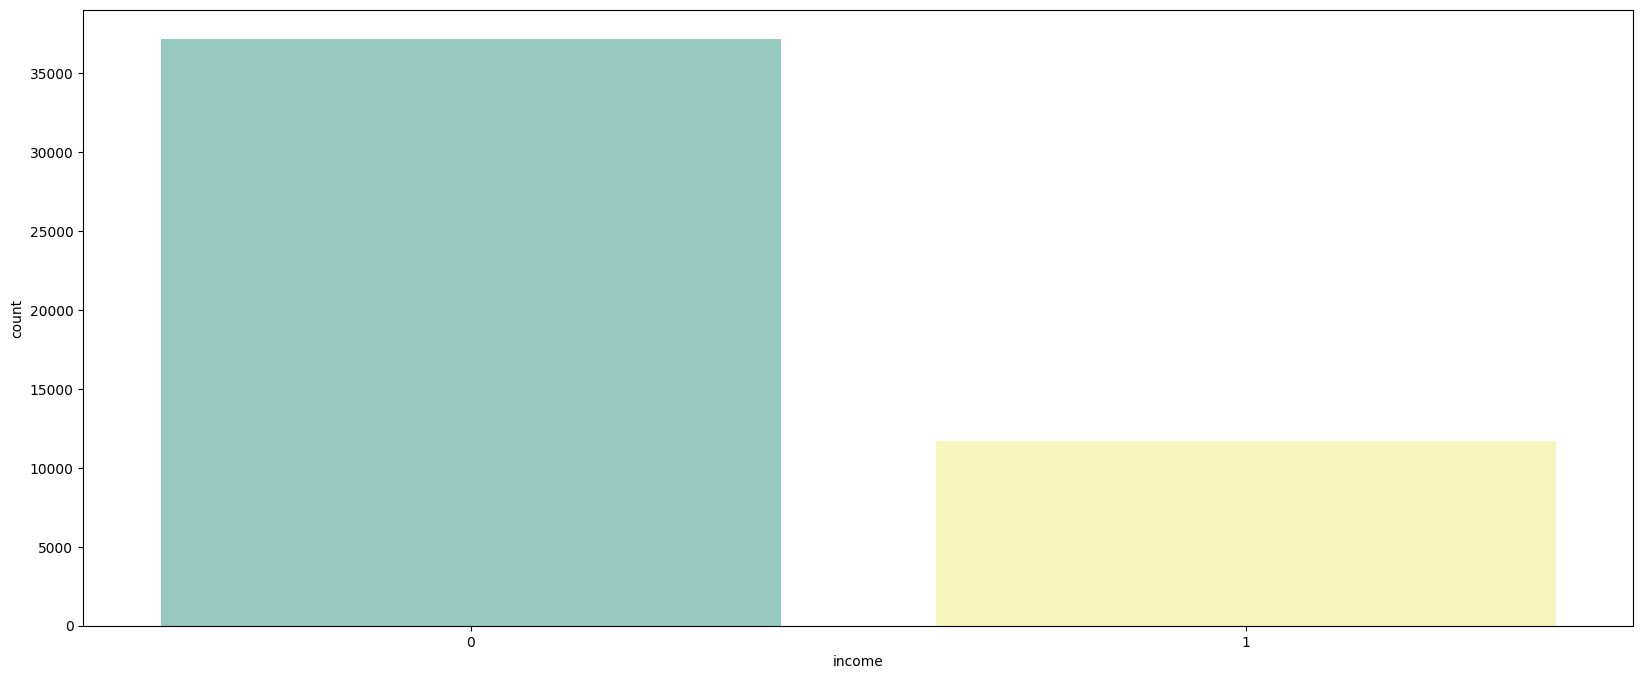

In [40]:
plt.figure(figsize=(20,8))
sns.countplot(x='income',data=data,palette='Set3')
plt.show()

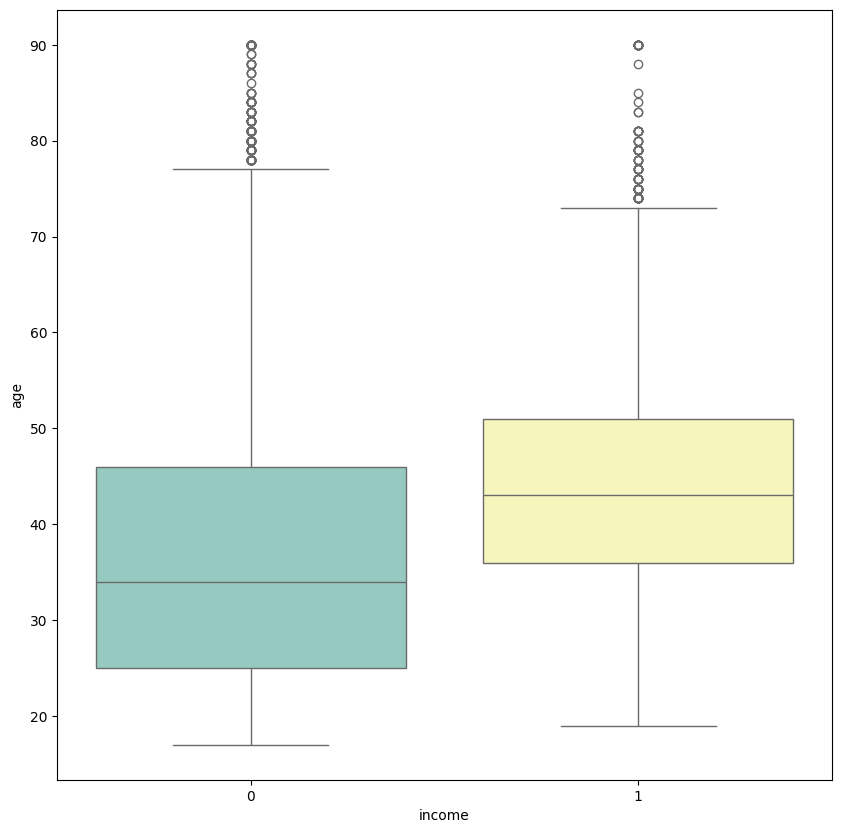

In [41]:
plt.figure(figsize=(10,10))
sns.boxplot(x='income',y='age',data=data,palette='Set3')
plt.show()

In [42]:
data[['income','age']].groupby(['income'],as_index=False).median().sort_values(by='age',ascending=False)

,income,age
1,1,43.0
0,0,34.0


In [43]:
import random

dataset=data[(np.abs(stats.zscore(data['age']))<3)]

income_1=dataset[dataset['income']==1]['age']
income_0=dataset[dataset['income']==0]['age']

income_0=income_0.values.tolist()
income_0=random.sample(income_0,100)
income_1=income_1.values.tolist()
income_1=random.sample(income_1,100)



In [44]:
from scipy.stats import ttest_ind
ttest,pval=ttest_ind(income_1,income_0,equal_var=False)
print('ttest',ttest)
print('p value',pval)

if pval<=0.05:
    print('we reject null hypothesis hence dependent or have relation')
else:
    print('we accept null hypothesis hence independent')

ttest 4.455088923663185
p value 1.4442589816602555e-05
we reject null hypothesis hence dependent or have relation


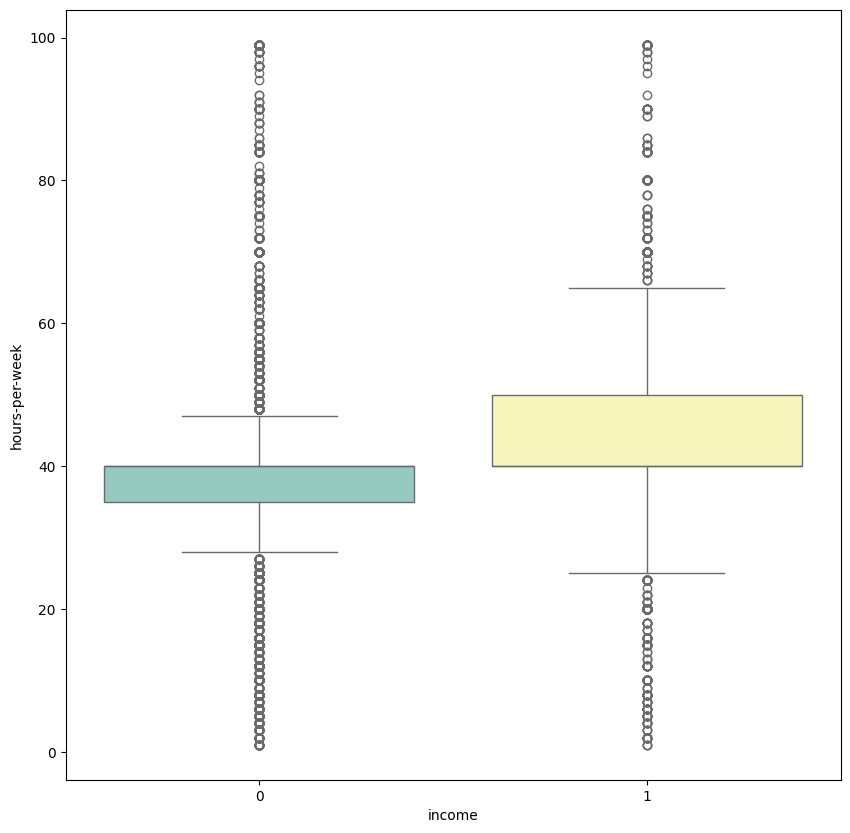

In [45]:
plt.figure(figsize=(10,10))
sns.boxplot(x='income',y='hours-per-week',data=data,palette='Set3')
plt.show()

In [46]:
data[['income','hours-per-week']].groupby(['income'],as_index=False).median().sort_values(by='hours-per-week',ascending=False)

,income,hours-per-week
0,0,40.0
1,1,40.0


In [47]:
import random

dataset=data[(np.abs(stats.zscore(data['hours-per-week']))<3)]

income_1=dataset[dataset['income']==1]['hours-per-week']
income_0=dataset[dataset['income']==0]['hours-per-week']

income_0=income_0.values.tolist()
income_0=random.sample(income_0,100)
income_1=income_1.values.tolist()
income_1=random.sample(income_1,100)

In [48]:
from scipy.stats import ttest_ind
ttest,pval=ttest_ind(income_1,income_0,equal_var=False)
print('ttest',ttest)
print('p value',pval)

if pval<=0.05:
    print('we reject null hypothesis hence dependent or have relation')
else:
    print('we accept null hypothesis hence independent')

ttest 3.6426679198723666
p value 0.00034504556114564274
we reject null hypothesis hence dependent or have relation


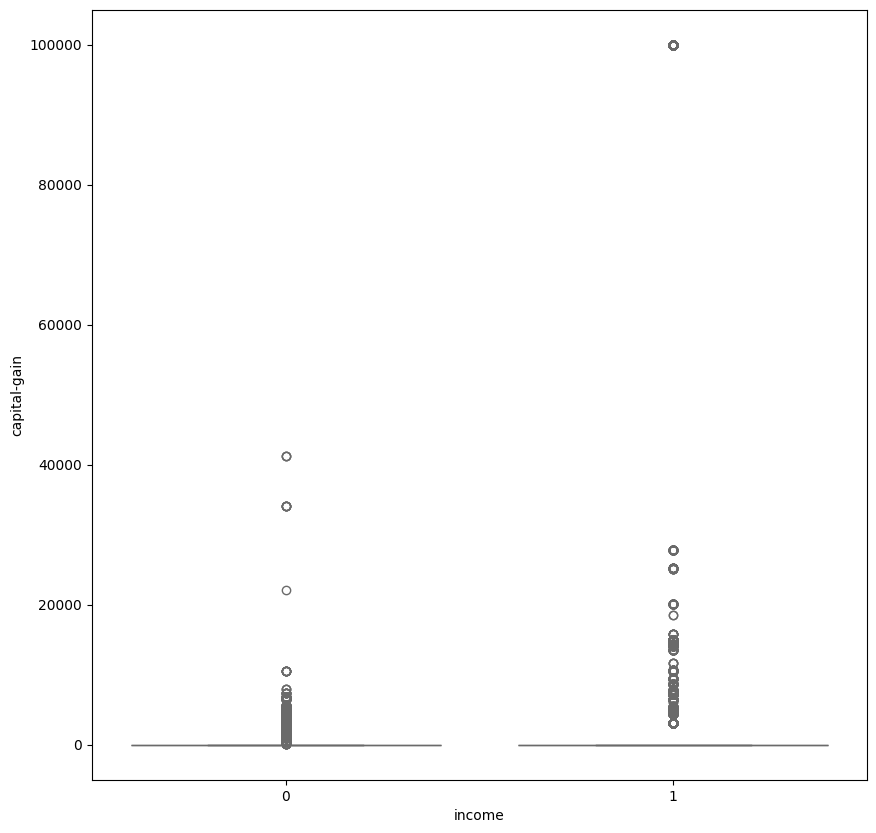

In [49]:
plt.figure(figsize=(10,10))
sns.boxplot(x='income',y='capital-gain',data=data,palette='Set3')
plt.show()

In [50]:
data[['income','capital-gain']].groupby(['income'],as_index=False).median().sort_values(by='capital-gain',ascending=False)

,income,capital-gain
0,0,0.0
1,1,0.0


In [51]:
import random

dataset=data[(np.abs(stats.zscore(data['capital-gain']))<2)]

income_1=dataset[dataset['income']==1]['capital-gain']
income_0=dataset[dataset['income']==0]['capital-gain']

income_0=income_0.values.tolist()
income_0=random.sample(income_0,100)
income_1=income_1.values.tolist()
income_1=random.sample(income_1,100)

from scipy.stats import ttest_ind
ttest,pval=ttest_ind(income_1,income_0,equal_var=False)
print('ttest',ttest)
print('p value',pval)

if pval<=0.05:
    print('we reject null hypothesis hence dependent or have relation')
else:
    print('we accept null hypothesis hence independent')

ttest 3.452242215397152
p value 0.0007974340845946104
we reject null hypothesis hence dependent or have relation


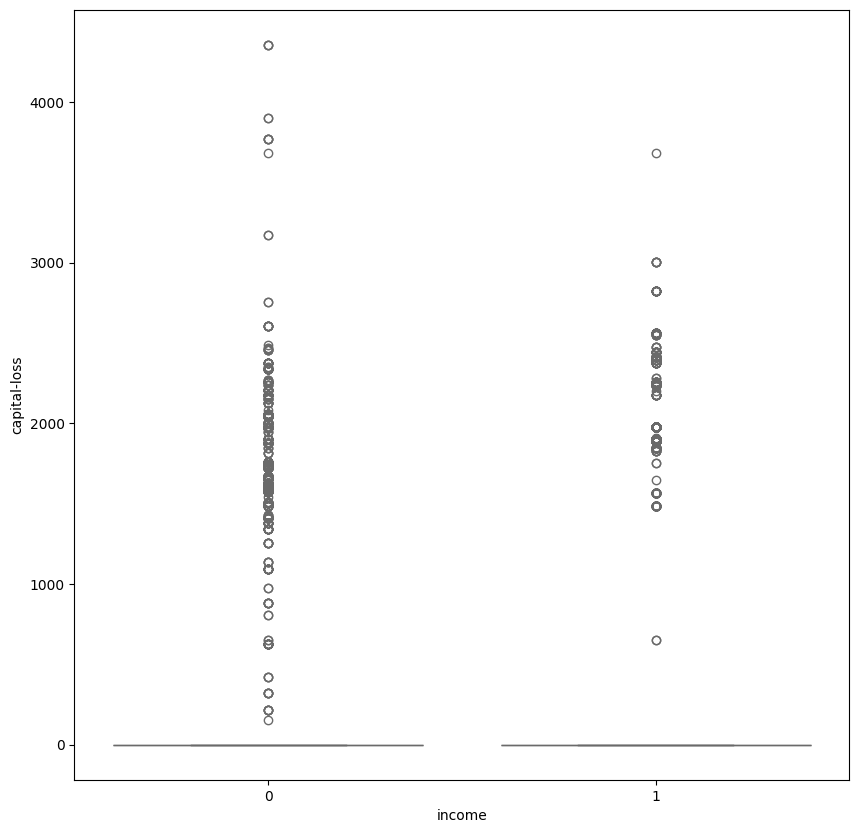

In [52]:
plt.figure(figsize=(10,10))
sns.boxplot(x='income',y='capital-loss',data=data,palette='Set3')
plt.show()

In [53]:
data[['income','capital-loss']].groupby(['income'],as_index=False).median().sort_values(by='capital-loss',ascending=False)

,income,capital-loss
0,0,0.0
1,1,0.0


In [54]:
import random

dataset=data[(np.abs(stats.zscore(data['capital-loss']))<3)]

income_1=dataset[dataset['income']==1]['capital-loss']
income_0=dataset[dataset['income']==0]['capital-loss']

income_0=income_0.values.tolist()
income_0=random.sample(income_0,100)
income_1=income_1.values.tolist()
income_1=random.sample(income_1,100)

from scipy.stats import ttest_ind
ttest,pval=ttest_ind(income_1,income_0,equal_var=False)
print('ttest',ttest)
print('p value',pval)

if pval<=0.05:
    print('we reject null hypothesis hence dependent or have relation')
else:
    print('we accept null hypothesis hence independent')

ttest nan
p value nan
we accept null hypothesis hence independent


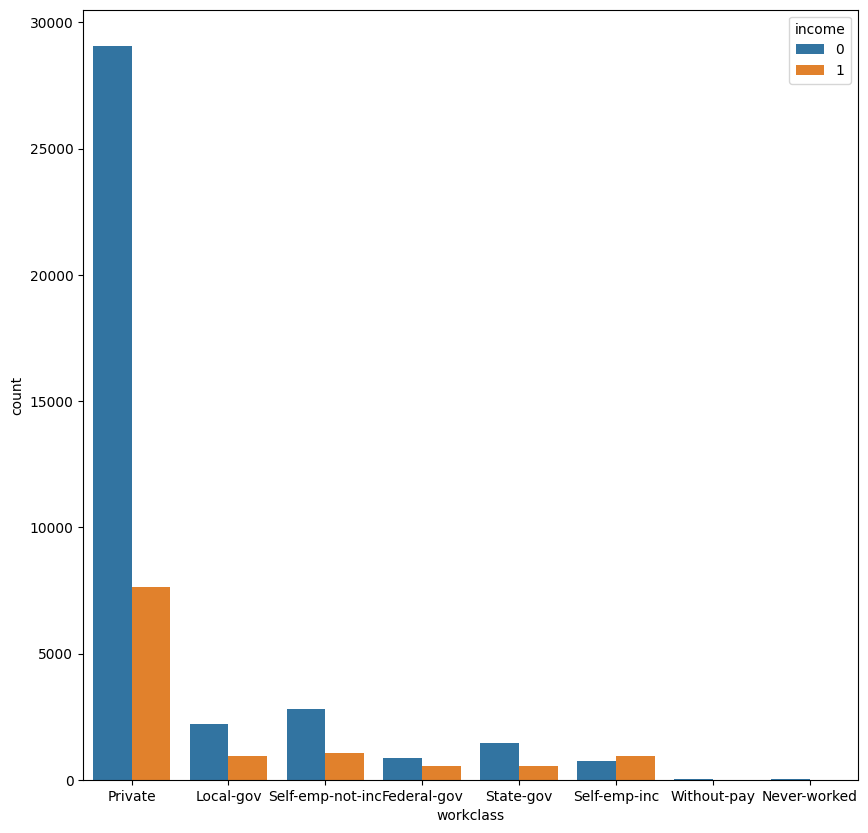

In [55]:
plt.figure(figsize=(10,10))
sns.countplot(x='workclass',hue='income',data=data)
plt.show()

In [56]:
c_t=pd.crosstab(data['workclass'].sample(frac=0.004,replace=True,random_state=1),data['income'].sample(frac=0.004,replace=True,random_state=1),margins=False)
c_t

income,0,1
workclass,,
Federal-gov,3,4
Local-gov,11,5
Private,104,38
Self-emp-inc,3,2
Self-emp-not-inc,12,7
State-gov,6,0


In [57]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stst,p,dof,expected = chi2_contingency(c_t)
print(dof)
print('p_value',p)
print(expected)

if p<=0.05:
    print("we reject null hypothesis hence dependent or have relation")
else:
    print("we accept null hypothesis hence independent")

5
p_value 0.2675096482718801
[[  4.98974359   2.01025641]
 [ 11.40512821   4.59487179]
 [101.22051282  40.77948718]
 [  3.56410256   1.43589744]
 [ 13.54358974   5.45641026]
 [  4.27692308   1.72307692]]
we accept null hypothesis hence independent


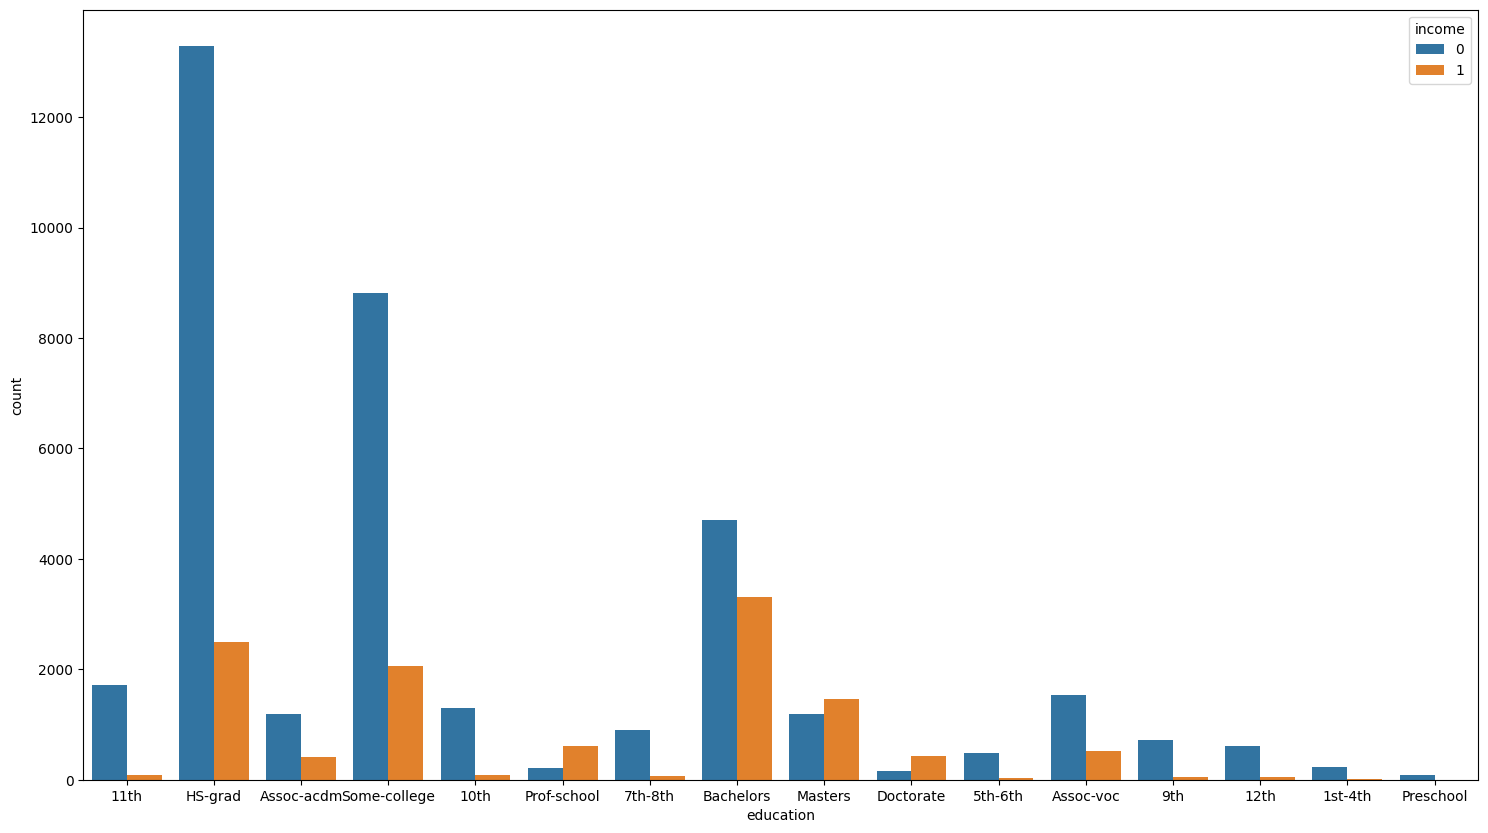

In [58]:
plt.figure(figsize=(18,10))
sns.countplot(x='education',hue='income',data=data)
plt.show()

In [59]:
c_t=pd.crosstab(data['education'].sample(frac=0.004,replace=True,random_state=1),data['income'].sample(frac=0.004,replace=True,random_state=1),margins=False)
c_t

income,0,1
education,,
10th,6,1
11th,12,0
12th,1,1
7th-8th,3,0
9th,1,0
Assoc-acdm,6,1
Assoc-voc,7,7
Bachelors,17,16
Doctorate,1,3


In [60]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stst,p,dof,expected = chi2_contingency(c_t)
print(dof)
print('p_value',p)
print(expected)

if p<=0.05:
    print("we reject null hypothesis hence dependent or have relation")
else:
    print("we accept null hypothesis hence independent")

12
p_value 0.00034662969607068616
[[ 4.98974359  2.01025641]
 [ 8.55384615  3.44615385]
 [ 1.42564103  0.57435897]
 [ 2.13846154  0.86153846]
 [ 0.71282051  0.28717949]
 [ 4.98974359  2.01025641]
 [ 9.97948718  4.02051282]
 [23.52307692  9.47692308]
 [ 2.85128205  1.14871795]
 [44.19487179 17.80512821]
 [ 9.26666667  3.73333333]
 [ 1.42564103  0.57435897]
 [24.94871795 10.05128205]]
we reject null hypothesis hence dependent or have relation


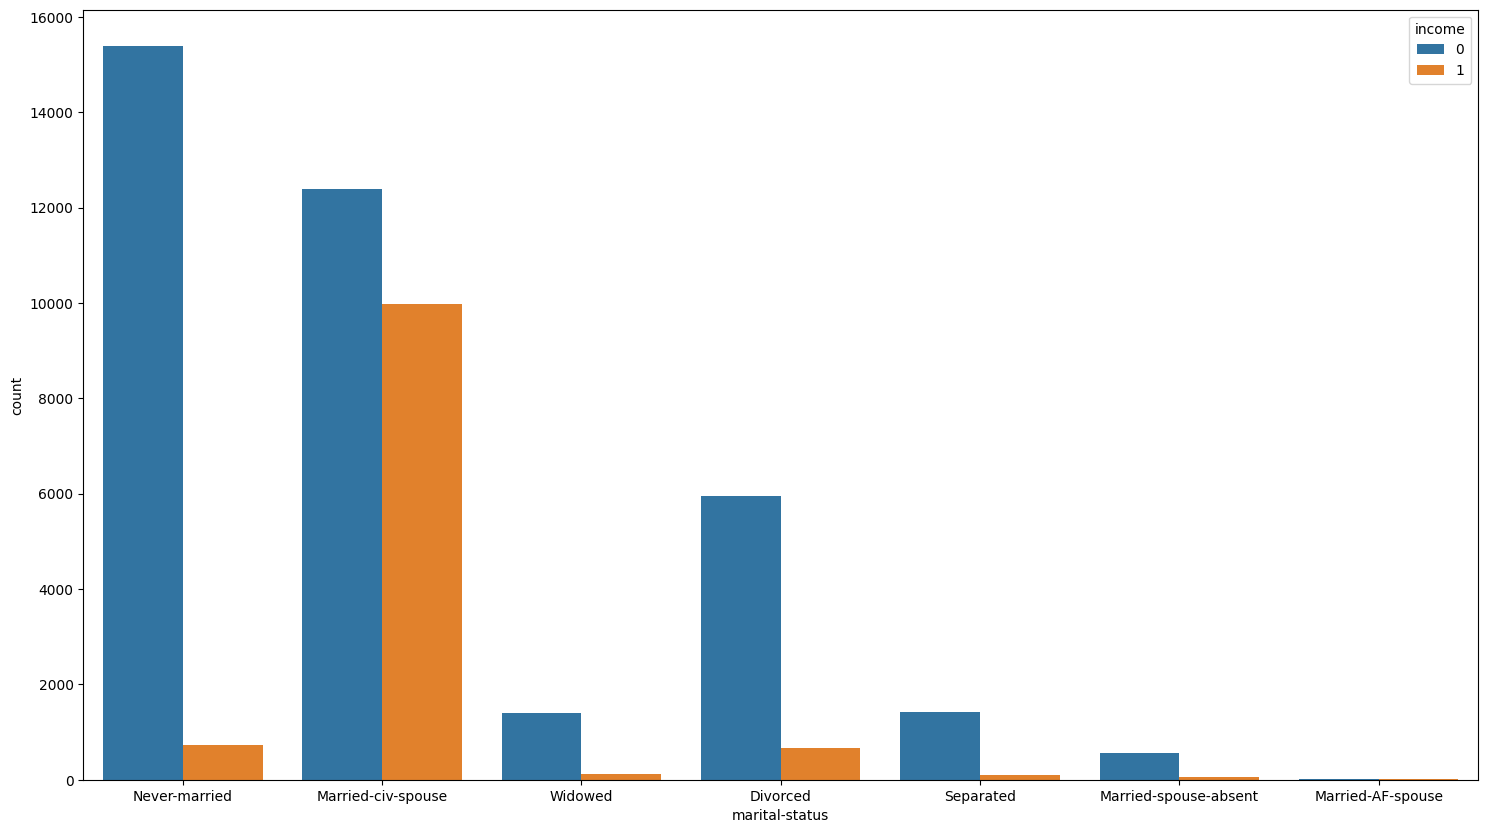

In [61]:
plt.figure(figsize=(18,10))
sns.countplot(x='marital-status',hue='income',data=data)
plt.show()

In [62]:
c_t=pd.crosstab(data['marital-status'].sample(frac=0.004,replace=True,random_state=1),data['income'].sample(frac=0.004,replace=True,random_state=1),margins=False)
c_t

income,0,1
marital-status,,
Divorced,17,2
Married-civ-spouse,52,45
Never-married,60,7
Separated,3,1
Widowed,7,1


In [63]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stst,p,dof,expected = chi2_contingency(c_t)
print(dof)
print('p_value',p)
print(expected)

if p<=0.05:
    print("we reject null hypothesis hence dependent or have relation")
else:
    print("we accept null hypothesis hence independent")

4
p_value 5.243817067319537e-06
[[13.54358974  5.45641026]
 [69.14358974 27.85641026]
 [47.75897436 19.24102564]
 [ 2.85128205  1.14871795]
 [ 5.7025641   2.2974359 ]]
we reject null hypothesis hence dependent or have relation


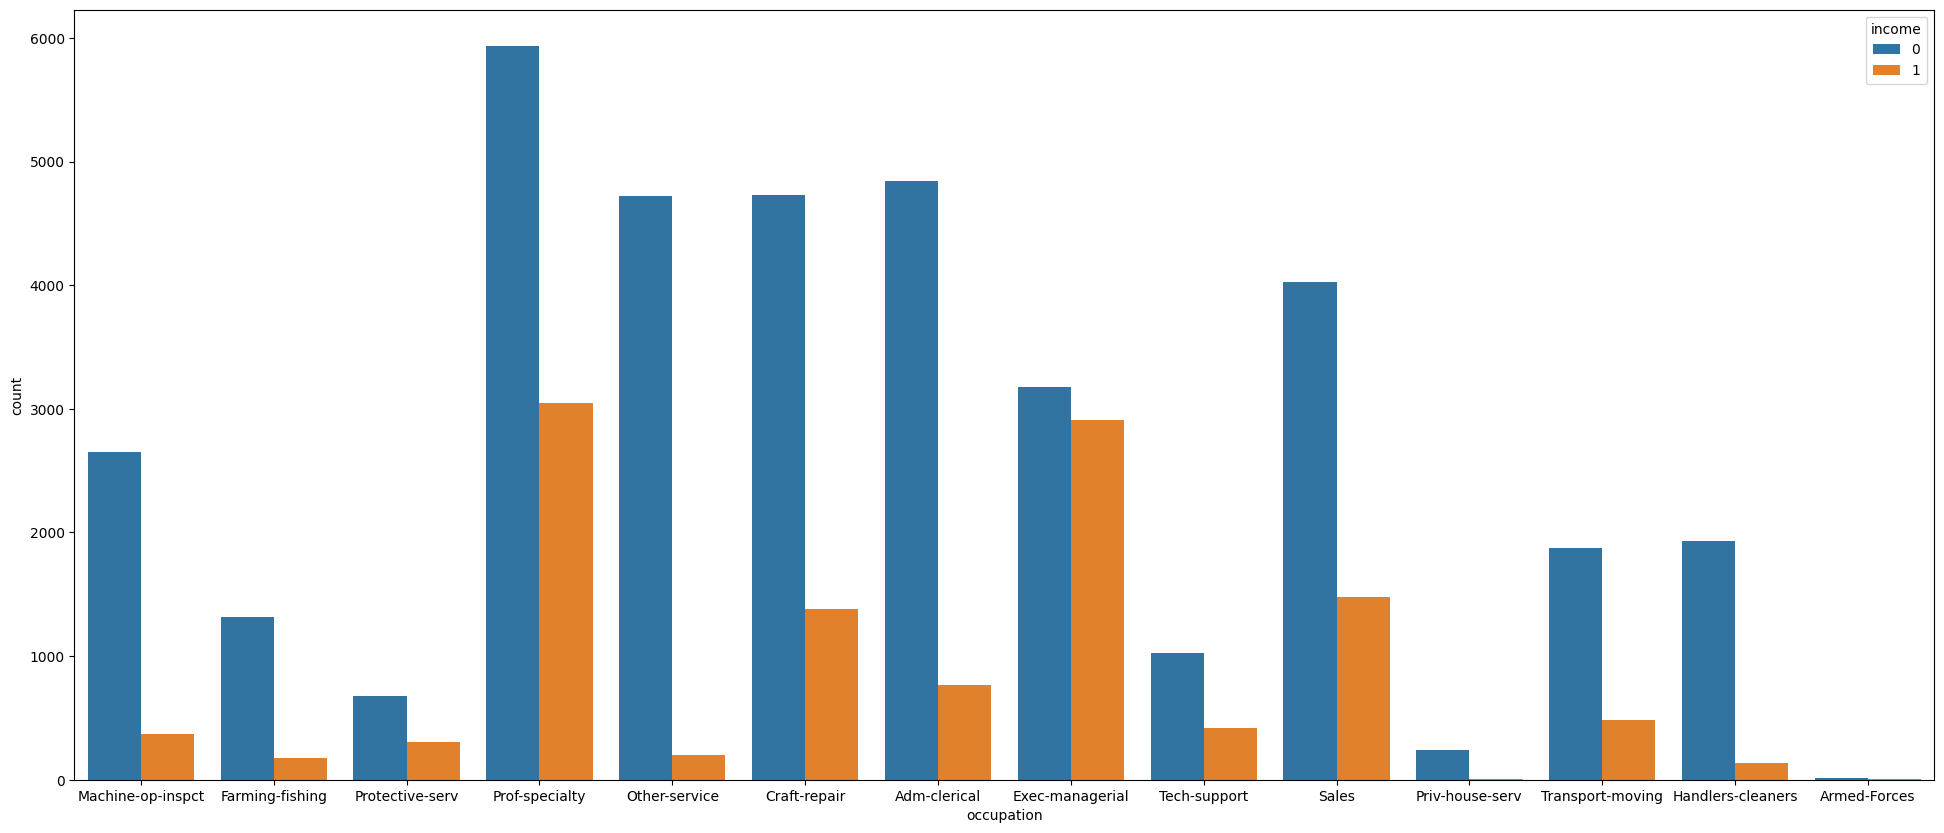

In [64]:
plt.figure(figsize=(24,10))
sns.countplot(x='occupation',hue='income',data=data)
plt.show()

In [65]:
c_t=pd.crosstab(data['occupation'].sample(frac=0.004,replace=True,random_state=1),data['income'].sample(frac=0.004,replace=True,random_state=1),margins=False)
c_t

income,0,1
occupation,,
Adm-clerical,17,6
Craft-repair,18,5
Exec-managerial,12,14
Farming-fishing,5,1
Handlers-cleaners,9,0
Machine-op-inspct,11,1
Other-service,14,0
Prof-specialty,22,16
Protective-serv,4,1


In [66]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stst,p,dof,expected = chi2_contingency(c_t)
print(dof)
print('p_value',p)
print(expected)

if p<=0.05:
    print("we reject null hypothesis hence dependent or have relation")
else:
    print("we accept null hypothesis hence independent")

11
p_value 0.008558194053873728
[[16.39487179  6.60512821]
 [16.39487179  6.60512821]
 [18.53333333  7.46666667]
 [ 4.27692308  1.72307692]
 [ 6.41538462  2.58461538]
 [ 8.55384615  3.44615385]
 [ 9.97948718  4.02051282]
 [27.08717949 10.91282051]
 [ 3.56410256  1.43589744]
 [16.39487179  6.60512821]
 [ 4.98974359  2.01025641]
 [ 6.41538462  2.58461538]]
we reject null hypothesis hence dependent or have relation


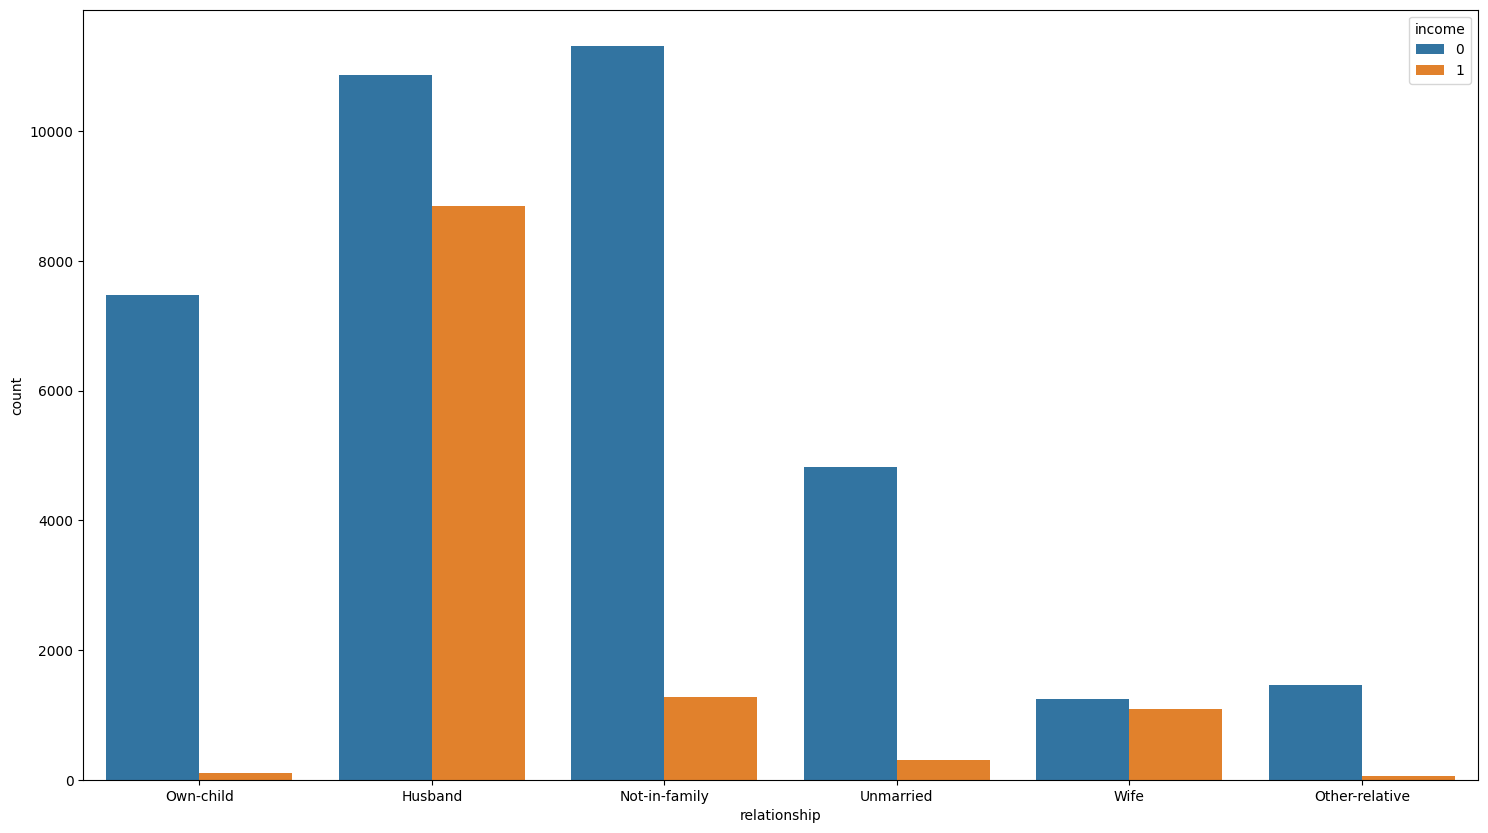

In [67]:
plt.figure(figsize=(18,10))
sns.countplot(x='relationship',hue='income',data=data)
plt.show()

In [68]:
c_t=pd.crosstab(data['relationship'].sample(frac=0.004,replace=True,random_state=1),data['income'].sample(frac=0.004,replace=True,random_state=1),margins=False)
c_t

income,0,1
relationship,,
Husband,47,39
Not-in-family,41,10
Other-relative,5,0
Own-child,26,0
Unmarried,16,1
Wife,4,6


In [69]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stst,p,dof,expected = chi2_contingency(c_t)
print(dof)
print('p_value',p)
print(expected)

if p<=0.05:
    print("we reject null hypothesis hence dependent or have relation")
else:
    print("we accept null hypothesis hence independent")

5
p_value 1.318411926429466e-06
[[61.3025641  24.6974359 ]
 [36.35384615 14.64615385]
 [ 3.56410256  1.43589744]
 [18.53333333  7.46666667]
 [12.11794872  4.88205128]
 [ 7.12820513  2.87179487]]
we reject null hypothesis hence dependent or have relation


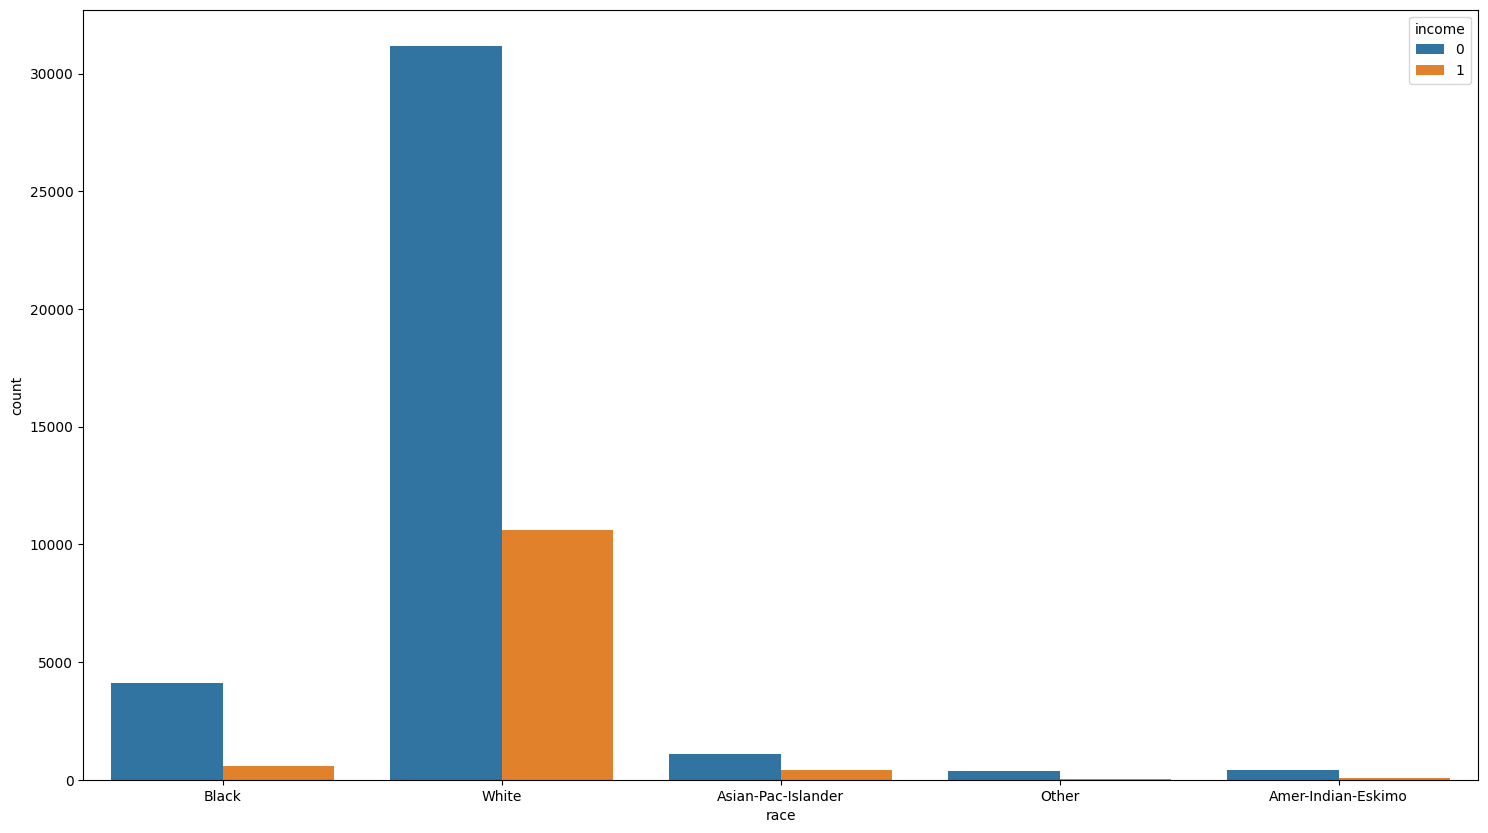

In [70]:
plt.figure(figsize=(18,10))
sns.countplot(x='race',hue='income',data=data)
plt.show()

In [71]:
c_t=pd.crosstab(data['race'].sample(frac=0.004,replace=True,random_state=1),data['income'].sample(frac=0.004,replace=True,random_state=1),margins=False)
c_t

income,0,1
race,,
Amer-Indian-Eskimo,2,1
Asian-Pac-Islander,5,0
Black,9,1
Other,1,0
White,122,54


In [72]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stst,p,dof,expected = chi2_contingency(c_t)
print(dof)
print('p_value',p)
print(expected)

if p<=0.05:
    print("we reject null hypothesis hence dependent or have relation")
else:
    print("we accept null hypothesis hence independent")

4
p_value 0.3435446765086313
[[  2.13846154   0.86153846]
 [  3.56410256   1.43589744]
 [  7.12820513   2.87179487]
 [  0.71282051   0.28717949]
 [125.45641026  50.54358974]]
we accept null hypothesis hence independent


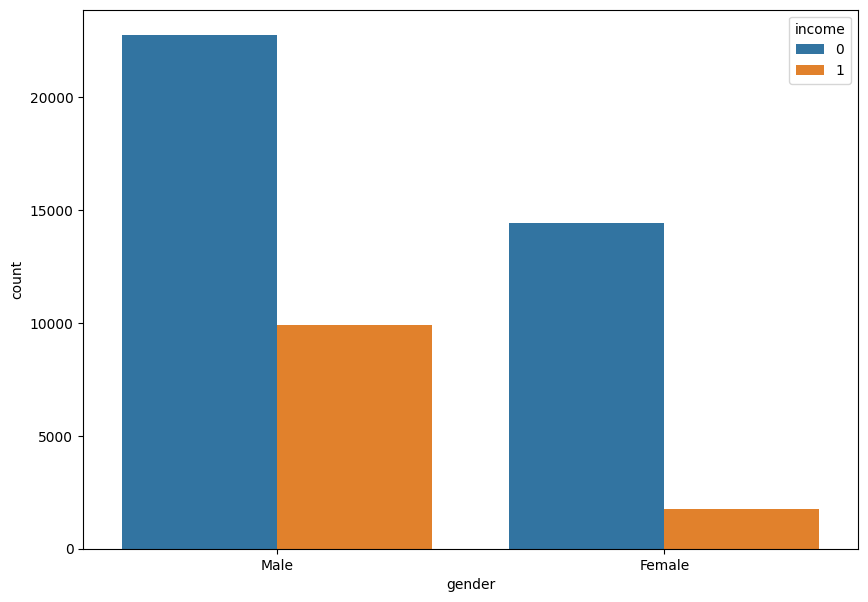

In [73]:
plt.figure(figsize=(10,7))
sns.countplot(x='gender',hue='income',data=data)
plt.show()

In [74]:
c_t=pd.crosstab(data['race'].sample(frac=0.004,replace=True,random_state=1),data['income'].sample(frac=0.004,replace=True,random_state=1),margins=False)
c_t

income,0,1
race,,
Amer-Indian-Eskimo,2,1
Asian-Pac-Islander,5,0
Black,9,1
Other,1,0
White,122,54


In [75]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stst,p,dof,expected = chi2_contingency(c_t)
print(dof)
print('p_value',p)
print(expected)

if p<=0.05:
    print("we reject null hypothesis hence dependent or have relation")
else:
    print("we accept null hypothesis hence independent")

4
p_value 0.3435446765086313
[[  2.13846154   0.86153846]
 [  3.56410256   1.43589744]
 [  7.12820513   2.87179487]
 [  0.71282051   0.28717949]
 [125.45641026  50.54358974]]
we accept null hypothesis hence independent


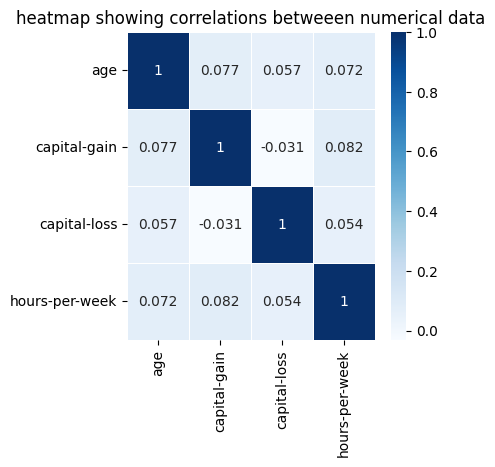

In [76]:
plt.figure(figsize=(4,4))
sns.heatmap(data_num.corr(numeric_only=True),annot=True,linewidths=0.5,cmap='Blues')
plt.title('heatmap showing correlations betweeen numerical data')
plt.show()
           

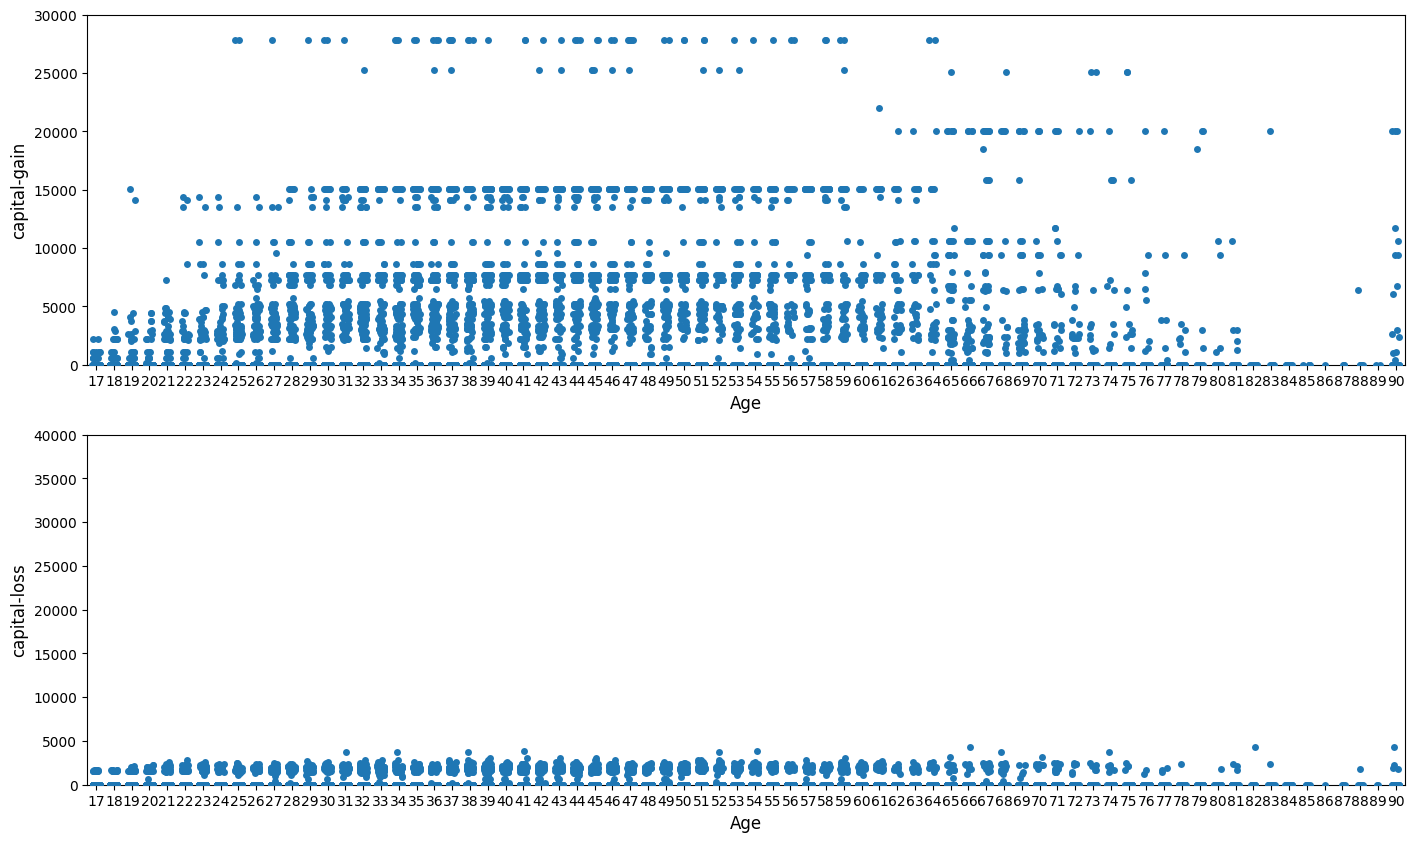

In [77]:
fig=plt.figure(figsize=(17,10))
ax=fig.add_subplot(2,1,1)
sns.stripplot(x='age',y='capital-gain',data=data,jitter=0.2,ax=ax)
plt.xlabel('Age',fontsize=12)
plt.ylabel('capital-gain',fontsize=12)
plt.ylim(0,30000)

ax=fig.add_subplot(2,1,2)
sns.stripplot(x='age',y='capital-loss',data=data,jitter=0.2,ax=ax)
plt.xlabel('Age',fontsize=12)
plt.ylabel('capital-loss',fontsize=12)
plt.ylim(0,40000)
plt.show()

In [78]:
cols=['workclass','occupation']
cat_col=data.dtypes[data.dtypes=='object']
for col in cat_col.index:
    if col in cols:
        print(f'==========================================={col}============================')
        print(data_num[data_num['age']==90][col].value_counts())
    else:
        continue

===========================================workclass============================
workclass
Private             43
Self-emp-not-inc     5
Local-gov            5
Federal-gov          2
Name: count, dtype: int64
===========================================occupation============================
occupation
Prof-specialty       16
Exec-managerial       9
Other-service         7
Adm-clerical          6
Craft-repair          5
Sales                 4
Machine-op-inspct     3
Transport-moving      2
Handlers-cleaners     1
Farming-fishing       1
Protective-serv       1
Name: count, dtype: int64


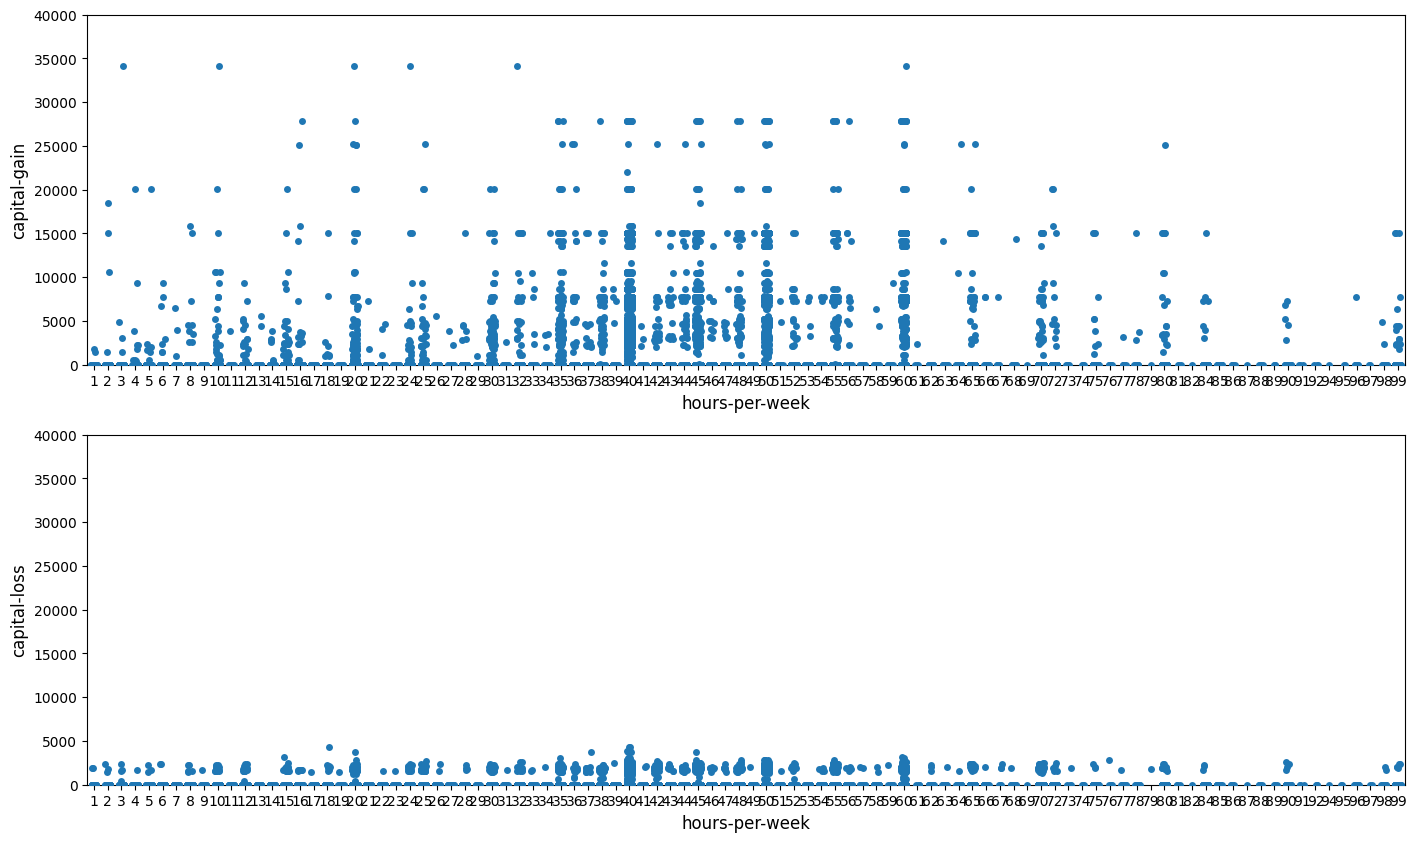

In [79]:
fig=plt.figure(figsize=(17,10))
ax=fig.add_subplot(2,1,1)
sns.stripplot(x='hours-per-week',y='capital-gain',data=data,jitter=0.2,ax=ax)
plt.xlabel('hours-per-week',fontsize=12)
plt.ylabel('capital-gain',fontsize=12)
plt.ylim(0,40000)

ax=fig.add_subplot(2,1,2)
sns.stripplot(x='hours-per-week',y='capital-loss',data=data,jitter=0.2,ax=ax)
plt.xlabel('hours-per-week',fontsize=12)
plt.ylabel('capital-loss',fontsize=12)
plt.ylim(0,40000)
plt.show()

In [80]:
cols=['workclass','occupation']
cat_col=data.dtypes[data.dtypes=='object']
for col in cat_col.index:
    if col in cols:
        print(f'==========================================={col}============================')
        print(data_num[data_num['hours-per-week']==99][col].value_counts())
    else:
        continue

===========================================workclass============================
workclass
Private             74
Self-emp-not-inc    36
Self-emp-inc        15
Local-gov            7
State-gov            3
Federal-gov          2
Name: count, dtype: int64
===========================================occupation============================
occupation
Prof-specialty       36
Farming-fishing      20
Transport-moving     19
Exec-managerial      18
Other-service        15
Craft-repair         10
Sales                 6
Protective-serv       4
Priv-house-serv       4
Adm-clerical          2
Tech-support          2
Handlers-cleaners     1
Name: count, dtype: int64


In [82]:
data['capital_change']=data['capital-gain']-data['capital-loss']
data["capital_change"].describe()

count    48842.000000
mean       991.565313
std       7475.549906
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_change, dtype: float64

<Axes: xlabel='capital_change', ylabel='Count'>

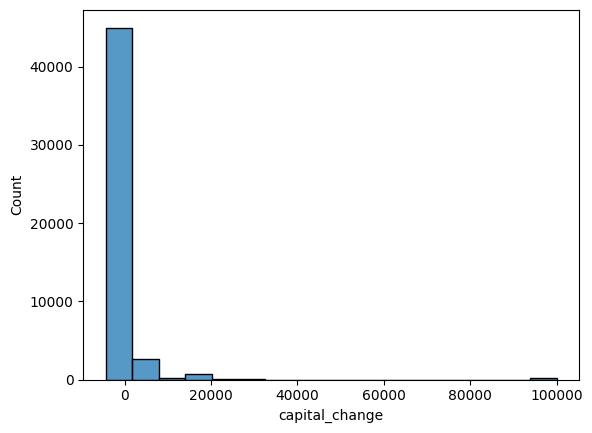

In [83]:
sns.histplot(x='capital_change',data=data)